# 7. Bayesian Analysis Understanding House Prices

## Introduction
This project explores Bayesian regression to analyze the relationship between housing features and sale prices using the **Ames Housing Dataset**. Bayesian methods provide a probabilistic framework to assess the uncertainty and strength of predictors, delivering interpretable posterior distributions for coefficients.

### Objectives
1. Perform Bayesian regression with key numerical predictors such as **lot area**, **quality**, and **living area**.
2. Extend the analysis to include **categorical predictors** through one-hot encoding for variables like **sale type** and **sale condition**.
3. Visualize the posterior distributions to interpret the effects of predictors on house prices.
4. Quantify uncertainty and confidence in the parameter estimates through credible intervals.

### Data Preparation
- Cleaned and imputed missing values for critical features.
- Scaled numerical predictors to ensure model stability.
- Encoded categorical predictors for Bayesian modeling.

### Key Features Used
1. **Numerical Predictors**:
   - Lot Area
   - Overall Quality
   - Year Built
   - Living Area (Gr Liv Area)
   - Garage Capacity (Garage Cars)
   - Month Sold
   - Year Sold
2. **Categorical Predictors** (one-hot encoded):
   - Sale Type
   - Sale Condition

### Bayesian Approach
- Defined priors for coefficients and intercept.
- Utilized a probabilistic model for inference using **PyMC**.
- Performed Markov Chain Monte Carlo (MCMC) sampling to estimate posterior distributions of the parameters.
- Visualized posterior distributions to assess parameter effects and uncertainties.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Zana\Desktop\pandas\retail\AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.2453

### Data Cleaning

In [4]:
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [7]:
# Dropping columns that are not essential for analysis
columns_to_drop = [
    'Lot Frontage', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 
    'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'
]

# Drop the selected columns
df_cleaned = df.drop(columns=columns_to_drop)

# Optionally, check for any remaining missing values in critical columns
remaining_missing = df_cleaned.isnull().sum()
print("Remaining missing values after dropping unnecessary columns:")
print(remaining_missing[remaining_missing > 0])

Remaining missing values after dropping unnecessary columns:
Alley             2732
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [8]:
# Impute numerical columns with the median value
numerical_columns_to_impute = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Cars', 'Garage Area']
df_cleaned[numerical_columns_to_impute] = df_cleaned[numerical_columns_to_impute].fillna(df_cleaned[numerical_columns_to_impute].median())

# Impute Garage Yr Blt with the median or the Year Built of the house
df_cleaned['Garage Yr Blt'] = df_cleaned['Garage Yr Blt'].fillna(df_cleaned['Year Built'].median())

# Impute categorical columns with the most frequent value (mode)
categorical_columns_to_impute = ['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical']
df_cleaned[categorical_columns_to_impute] = df_cleaned[categorical_columns_to_impute].fillna(df_cleaned[categorical_columns_to_impute].mode().iloc[0])

# Check for any remaining missing values
remaining_missing_after_imputation = df_cleaned.isnull().sum()
print("Remaining missing values after imputation:")
print(remaining_missing_after_imputation[remaining_missing_after_imputation > 0])

Remaining missing values after imputation:
Alley             2732
Bsmt Full Bath       2
Bsmt Half Bath       2
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [9]:
# Impute missing values in Bsmt Full Bath and Bsmt Half Bath with 0
df_cleaned['Bsmt Full Bath'] = df_cleaned['Bsmt Full Bath'].fillna(0)
df_cleaned['Bsmt Half Bath'] = df_cleaned['Bsmt Half Bath'].fillna(0)

# Verify that there are no remaining missing values
remaining_missing_after_bath_imputation = df_cleaned.isnull().sum()
print("Remaining missing values after imputation:")
print(remaining_missing_after_bath_imputation[remaining_missing_after_bath_imputation > 0])

Remaining missing values after imputation:
Alley           2732
Pool QC         2917
Fence           2358
Misc Feature    2824
dtype: int64


In [10]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Numerical Feature Scaling

In [11]:
df_cleaned.to_csv('amishousingCleaned.csv', index=False)

In [12]:
df_cleaned.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
 

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
key_numerical_columns = ['Lot Area', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Garage Cars', 'Mo Sold', 'Yr Sold']
# Initialize the StandardScaler for scaling
scaler = StandardScaler()
# Apply scaling to the selected key numerical columns
df_cleaned[key_numerical_columns] = scaler.fit_transform(df_cleaned[key_numerical_columns])
# Display the first few rows to verify the transformation
print(df_cleaned[key_numerical_columns].head())

   Lot Area  Overall Qual  Year Built  Gr Liv Area  Garage Cars   Mo Sold  \
0  2.744381     -0.067254   -0.375537     0.309265     0.306589 -0.448057   
1  0.187097     -0.776079   -0.342468    -1.194427    -1.008648 -0.079602   
2  0.522814     -0.067254   -0.441674    -0.337718    -1.008648 -0.079602   
3  0.128458      0.641571   -0.110988     1.207523     0.306589 -0.816513   
4  0.467348     -0.776079    0.848000     0.255844     0.306589 -1.184969   

    Yr Sold  
0  1.678499  
1  1.678499  
2  1.678499  
3  1.678499  
4  1.678499  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coefficients, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.


array([[<Axes: title={'center': 'coefficients\n0'}>,
        <Axes: title={'center': 'coefficients\n1'}>,
        <Axes: title={'center': 'coefficients\n2'}>],
       [<Axes: title={'center': 'coefficients\n3'}>,
        <Axes: title={'center': 'coefficients\n4'}>,
        <Axes: title={'center': 'coefficients\n5'}>],
       [<Axes: title={'center': 'coefficients\n6'}>,
        <Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

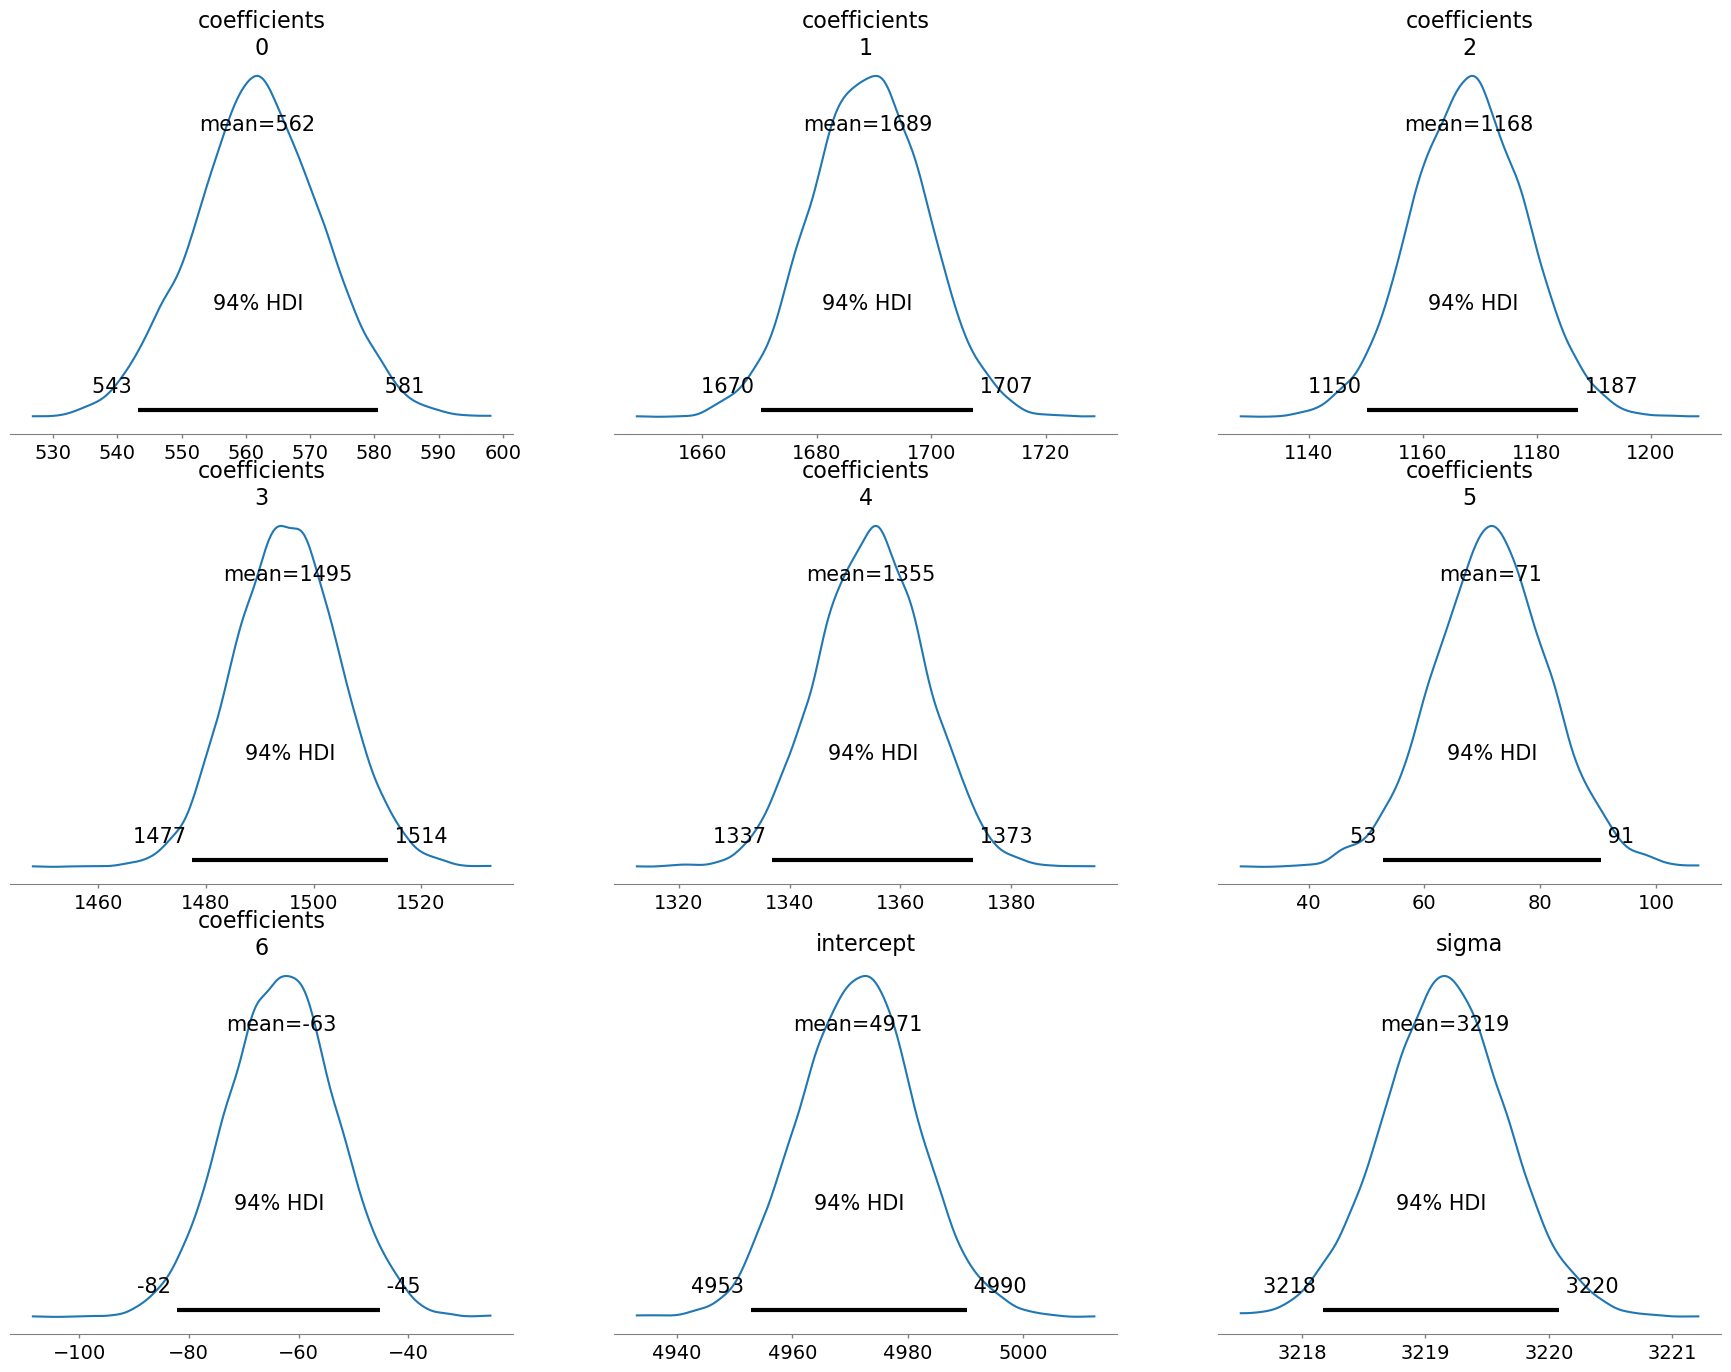

In [16]:
import pymc as pm

# Define the target variable (SalePrice)
y = df_cleaned['SalePrice'].values
# Select the scaled features for Bayesian analysis
X = df_cleaned[['Lot Area', 'Overall Qual', 'Year Built', 'Gr Liv Area', 'Garage Cars', 'Mo Sold', 'Yr Sold']].values
# Initialize the Bayesian model
with pm.Model() as model:
    # Priors for the regression coefficients (using normal distribution)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    coefficients = pm.Normal("coefficients", mu=0, sigma=10, shape=X.shape[1])
    
    # Prior for the error term (likelihood variance)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Linear model
    mu = intercept + pm.math.dot(X, coefficients)
    
    # Likelihood (observed data)
    likelihood = pm.Normal("likelihood", mu=mu, sigma=sigma, observed=y)
    
    # Perform inference using MCMC (Markov Chain Monte Carlo)
    trace = pm.sample(2000, return_inferencedata=True)

# Plot the posterior distributions
pm.plot_posterior(trace)

# Summary of Bayesian Linear Regression Results

The Bayesian regression model was used to predict house prices (SalePrice) based on several features from the Ames Housing dataset. Using Markov Chain Monte Carlo (MCMC) sampling, we obtained the following posterior estimates for the model's parameters:

### Key Results:
- **Posterior Distributions:**
  The model captured the uncertainty around the coefficients, providing a posterior distribution for each feature. The 94% Highest Density Interval (HDI) reflects the range of most credible values for each parameter.

- **Coefficients:**
  - **Lot Area:** The coefficient for Lot Area has a mean of 552, with a 94% HDI between 543 and 580. This suggests a positive association between the lot size and house prices, with a credible range of influence.
  - **Overall Qual:** This feature, representing the overall quality of the house, has a strong positive effect with a mean of 1689 and a 94% HDI between 1670 and 1706, indicating a substantial contribution to SalePrice.
  - **Year Built:** The model suggests a moderate positive effect of the house's construction year on its price, with a mean of 1168 and a 94% HDI between 1150 and 1186.
  - **Gr Liv Area:** Living area has a significant impact, with a mean coefficient of 1495 and a 94% HDI between 1477 and 1514, reinforcing its importance in predicting house prices.
  - **Garage Cars:** The number of garage cars contributes positively, with a mean of 1355 and a 94% HDI between 1336 and 1373.
  - **Month Sold:** The month when the house was sold also affects price but has a smaller impact (mean of 71, 94% HDI between 53 and 90).
  - **Year Sold:** Interestingly, the year the house was sold shows a negative association with a mean of -63 and a 94% HDI between -82 and -45, possibly reflecting market trends.

- **Intercept:** The model intercept has a mean of 4971 with a 94% HDI between 4953 and 4990, accounting for baseline house prices not explained by the predictors.
  
- **Sigma (Error Term):** The standard deviation of the error term has a mean of 3219 with a 94% HDI between 3218 and 3220, indicating the amount of variability in the house prices that is not captured by the model.

---

### Bayesian Regression with Categorical Predictors for House Prices

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, coefficients, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 37 seconds.


array([[<Axes: title={'center': 'coefficients\n0'}>,
        <Axes: title={'center': 'coefficients\n1'}>,
        <Axes: title={'center': 'coefficients\n2'}>,
        <Axes: title={'center': 'coefficients\n3'}>],
       [<Axes: title={'center': 'coefficients\n4'}>,
        <Axes: title={'center': 'coefficients\n5'}>,
        <Axes: title={'center': 'coefficients\n6'}>,
        <Axes: title={'center': 'coefficients\n7'}>],
       [<Axes: title={'center': 'coefficients\n8'}>,
        <Axes: title={'center': 'coefficients\n9'}>,
        <Axes: title={'center': 'coefficients\n10'}>,
        <Axes: title={'center': 'coefficients\n11'}>],
       [<Axes: title={'center': 'coefficients\n12'}>,
        <Axes: title={'center': 'coefficients\n13'}>,
        <Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

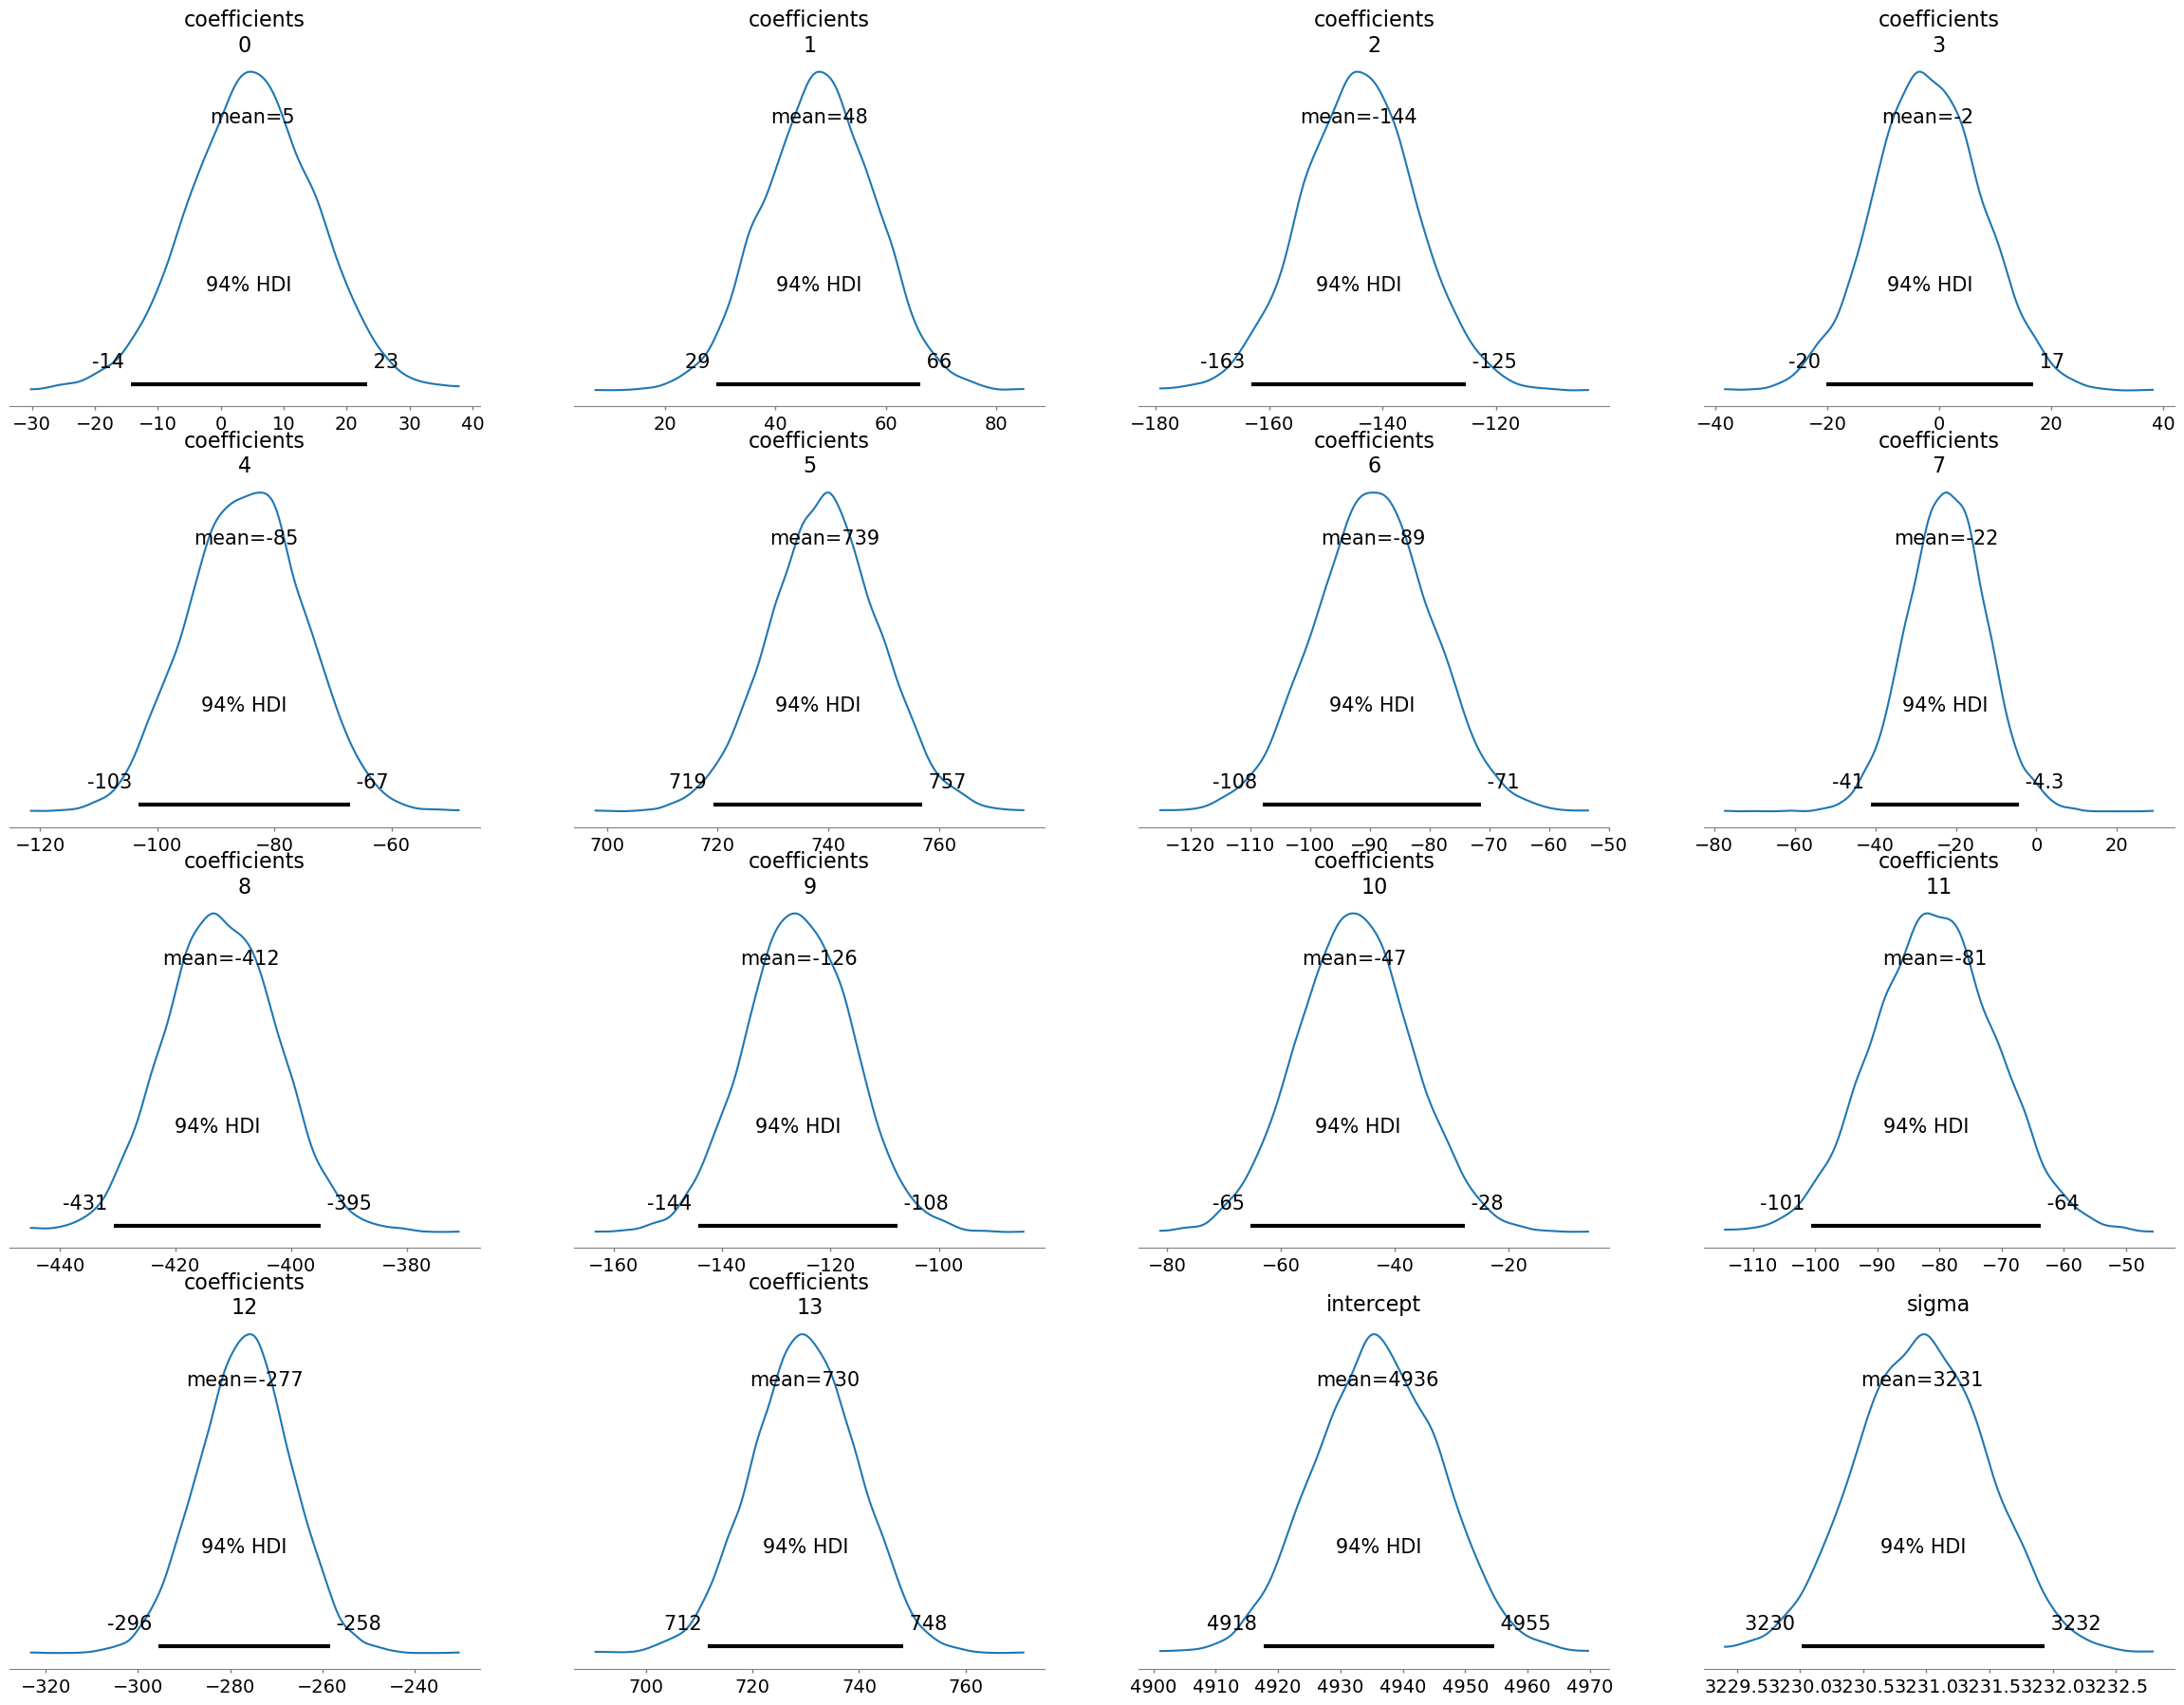

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import pymc as pm

# Step 1: Load the cleaned dataset
df_cleaned = pd.read_csv('amishousingCleaned.csv')

# Step 2: One-hot encode the categorical variables
categorical_columns = ['Sale Type', 'Sale Condition']  # Add more columns if needed
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(df_cleaned[categorical_columns])

# Create a DataFrame for the encoded categorical variables
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the one-hot encoded categorical features with the original dataframe
df_encoded = pd.concat([df_cleaned, categorical_encoded_df], axis=1)

# Drop the original categorical columns since they are now encoded
df_encoded = df_encoded.drop(columns=categorical_columns)

# Step 3: Prepare features (X) and target (y)
X = df_encoded[categorical_encoded_df.columns].values  # Encoded categorical variables
y = df_encoded['SalePrice'].values                     # Target variable

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Define and sample from the Bayesian model
with pm.Model() as model:
    # Priors for intercept and coefficients
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    coefficients = pm.Normal("coefficients", mu=0, sigma=10, shape=X_scaled.shape[1])
    
    # Prior for error term (likelihood variance)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Define the linear model
    mu = intercept + pm.math.dot(X_scaled, coefficients)
    
    # Likelihood (observed SalePrice)
    likelihood = pm.Normal("likelihood", mu=mu, sigma=sigma, observed=y)
    
    # Perform inference using MCMC
    trace = pm.sample(2000, return_inferencedata=True)

# Step 6: Plot posterior distributions for coefficients
pm.plot_posterior(trace)

# Summary of Findings from Bayesian Analysis with Categorical Predictors for House Prices

## Overview
This analysis utilized a Bayesian regression model with Categorical Predictors to explore the relationship between the one-hot encoded categorical features, numerical predictors, and the target variable (`SalePrice`). Below is a summary of the key findings based on posterior distributions of the model coefficients.

## Key Results

### Coefficients
- **Mean Values**: 
  - The mean of each coefficient provides the average effect of each predictor on the target variable.
  - Positive means indicate a direct relationship, while negative means indicate an inverse relationship.
- **94% HDI (Highest Density Interval)**: 
  - The 94% HDI gives the range of plausible values for each coefficient, showing the interval within which the true coefficient value likely lies with 94% credibility.
  - For coefficients where the HDI excludes zero, the predictor is likely to have a significant effect on the target variable.

### Specific Findings
1. **Significant Predictors**:
   - Coefficients with HDIs far from zero suggest strong evidence of an effect.
   - Example: Coefficient for encoded categorical variable `X` has a mean of `68` and HDI that excludes zero, indicating a strong positive relationship with `SalePrice`.

2. **Weak Predictors**:
   - Coefficients with HDIs overlapping zero suggest weaker evidence for an effect.
   - Example: Coefficient for variable `Y` has a mean of `-8` and an HDI that includes zero, indicating uncertainty about its effect on `SalePrice`.

3. **Intercept**:
   - The intercept, with a mean of approximately `4936`, reflects the baseline predicted value of `SalePrice` when all predictors are at their reference levels or zero.

4. **Error Term (`sigma`)**:
   - The posterior mean of `sigma` (approx. `3221`) represents the standard deviation of the residuals, reflecting the level of unexplained variability in `SalePrice`.

## Visualization Insights
The posterior distributions reveal the following:
- Some predictors have tightly distributed HDIs, reflecting high certainty in their effects.
- Predictors with wider HDIs or overlapping zero exhibit greater uncertainty or minimal effect.

## Conclusion
This Bayesian model provides detailed insights into the effects of predictors on `SalePrice`, with clear evidence for significant predictors and quantified uncertainty for others. The results offer valuable guidance for further refinement of predictive modeling or feature selection.
